# Dataset analyse
## Data counts

In [2]:
import pandas as pd

import dataset
import matplotlib.pyplot as plt

retail_dataset = dataset.Dataset("retail.csv")
print(retail_dataset.df.count())
retail_dataset.handle_missing_or_wrong_values()
print()
print(retail_dataset.df.count())



Invoice        1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Invoice        805426
StockCode      805426
Description    805426
Quantity       805426
InvoiceDate    805426
Price          805426
Customer ID    805426
Country        805426
dtype: int64


## Over time
A plot for every hour of the day with how many products are sold


Relative sales weekdays: 185542.6
Relative sales weekends: 69829.0


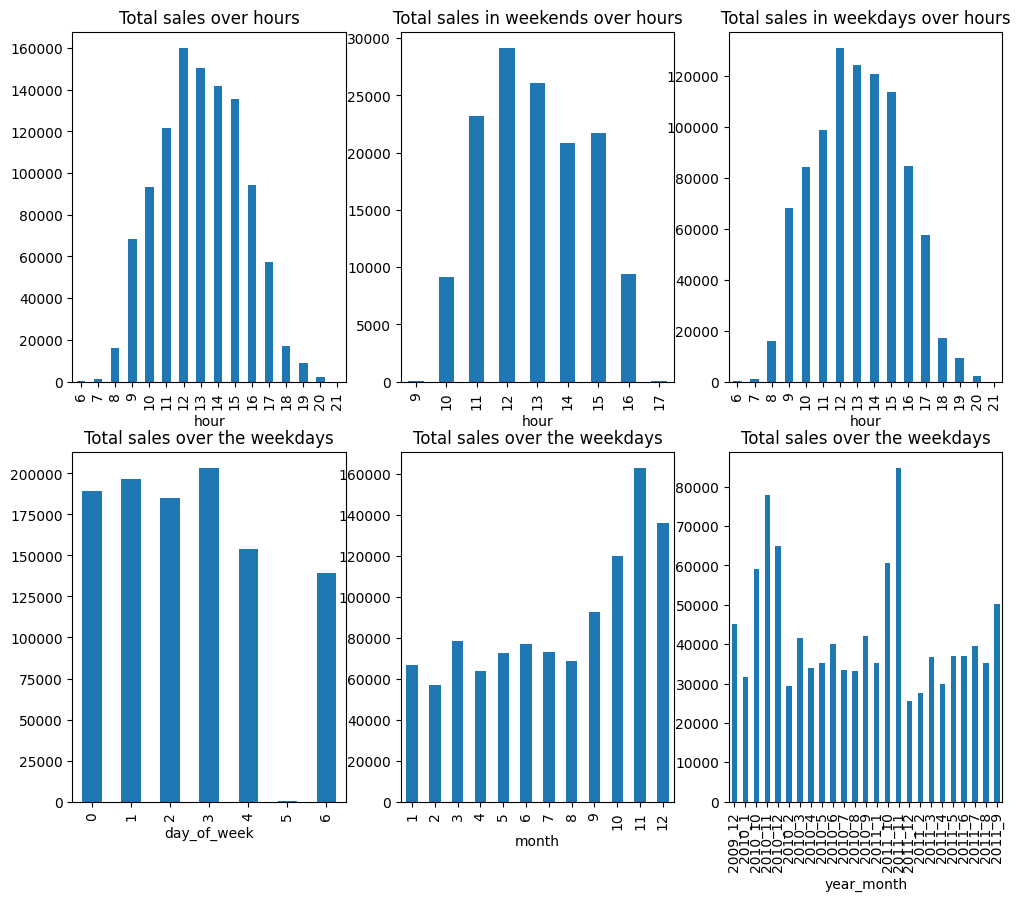

In [34]:
retail_dataset = dataset.Dataset("retail.csv")
#retail_dataset.handle_missing_or_wrong_values()
retail_dataset.df['hour'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.hour)
retail_dataset.df['day_of_week'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.day_of_week)
retail_dataset.df['month'] = retail_dataset.df['InvoiceDate'].apply(lambda date: date.month)
retail_dataset.df['year_month'] = retail_dataset.df['InvoiceDate'].apply(lambda date: f"{date.year}_{date.month}")

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

retail_dataset.df['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales over hours', ax=axes[0,0])
retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week >= 5]['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales in weekends over hours', ax=axes[0,1])
retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week < 5]['hour'].value_counts().sort_index().plot(kind='bar', title='Total sales in weekdays over hours', ax=axes[0,2])

retail_dataset.df['day_of_week'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,0])

retail_dataset.df['month'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,1])

retail_dataset.df['year_month'].value_counts().sort_index().plot(kind='bar', title='Total sales over the weekdays', ax=axes[1,2])

print("Relative sales weekdays:", retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week < 5].count()["StockCode"] / 5)
print("Relative sales weekends:", retail_dataset.df[retail_dataset.df['InvoiceDate'].dt.day_of_week >= 5].count()["StockCode"] / 2)

### Result analyzes
When we look at the graph we can conclude following things
The sales of products over the day is normally distributed around 12u for weekdays and weekend days
  - Some more unexpected results are that people buy earlier and later on weekdays than on weekends.
  - There is also more sold on weekdays dan on weekend days (if we look relative on a per day basis)
  - An other unexpected result is that on saturday (day 5) there are almost no sales, witch is quite unexpected for an e-commerce store
  - When we look at our per month we see an increase at the end of the year, this is expected because around this moment in the year there is a lot of shopping going on for the holidays
  - When we look at our year_month plot we can see this recurring increase at the end of the year



## Performance difference loops and pandas implementation

In [8]:
from datetime import datetime

retail_dataset = dataset.Dataset("retail.csv")
start_time = datetime.now()

df1 = retail_dataset.df[retail_dataset.df["Description"] != ""]

end_time_1 = datetime.now()

for index, row in retail_dataset.df.iterrows():
    if row["Description"] != "":
        retail_dataset.df.drop(index=index, inplace=True)

end_time_2 = datetime.now()

print(f"time taken pandas {start_time - end_time_1} | time taken loop {end_time_2 - end_time_1}")

KeyboardInterrupt: 

# Data categorization
To know how to categorize the data we will first plot the values to get an idea of how our data is distributed

## Price distribution

In [1]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()

print("max", retail_dataset.df['Price'].max())
print("min", retail_dataset.df['Price'].min())
print("mean", retail_dataset.df['Price'].mean())
print("median", retail_dataset.df['Price'].median())

fig, axes = plt.subplots(2, 3)

limited_information =  retail_dataset.df
limited_information['Price'].plot(kind='hist', title='All prices', ax=axes[0,0])

limited_information =  limited_information[limited_information["Price"] <= 5]
limited_information['Price'].plot(kind='hist', title='Prices <= 5', ax=axes[0,1])
print("items Prices <= 5:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 5]
limited_information =  limited_information[limited_information["Price"] <= 20]
limited_information['Price'].plot(kind='hist', title='5 < Prices <= 20', ax=axes[0,2])
print("items 5 < Prices <= 20:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 20]
limited_information =  limited_information[limited_information["Price"] <= 100]
limited_information['Price'].plot(kind='hist', title='20 < Prices <= 100', ax=axes[1,0])
print("items 20 < Prices <= 100:", limited_information['Price'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Price"] > 100]
limited_information['Price'].plot(kind='hist', title='100 < Prices', ax=axes[1,1])
print("items 100 <= Prices:", limited_information['Price'].count())

NameError: name 'dataset' is not defined

## Quantity distribution

max 74215
min 1
mean 13.295253636637415
median 6.0
Quantity == 1	 133428
1 < Quantity <= 5	 223187
5 < Quantity <= 20	 261117
20 < Quantity <= 100	 87329
100 < Quantity <= 1000	 8586
1000 < Quantity	 268


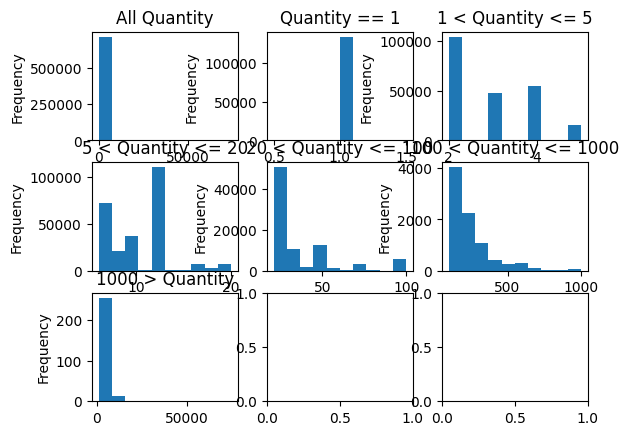

In [5]:
retail_dataset = dataset.Dataset("retail.csv")
retail_dataset.handle_missing_or_wrong_values()

print("max", retail_dataset.df['Quantity'].max())
print("min", retail_dataset.df['Quantity'].min())
print("mean", retail_dataset.df['Quantity'].mean())
print("median", retail_dataset.df['Quantity'].median())

fig, axes = plt.subplots(3, 3)

limited_information =  retail_dataset.df
limited_information['Quantity'].plot(kind='hist', title='All Quantity', ax=axes[0,0])

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] == 1]
limited_information['Quantity'].plot(kind='hist', title='Quantity == 1', ax=axes[0,1])
print("Quantity == 1\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] <= 5]
limited_information =  limited_information[limited_information["Quantity"] > 1]
limited_information['Quantity'].plot(kind='hist', title='1 < Quantity <= 5', ax=axes[0,2])
print("1 < Quantity <= 5\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 5]
limited_information =  limited_information[limited_information["Quantity"] <= 20]
limited_information['Quantity'].plot(kind='hist', title='5 < Quantity <= 20', ax=axes[1,0])
print("5 < Quantity <= 20\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 20]
limited_information =  limited_information[limited_information["Quantity"] <= 100]
limited_information['Quantity'].plot(kind='hist', title='20 < Quantity <= 100', ax=axes[1,1])
print("20 < Quantity <= 100\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 100]
limited_information =  limited_information[limited_information["Quantity"] <= 1000]
limited_information['Quantity'].plot(kind='hist', title='100 < Quantity <= 1000', ax=axes[1,2])
print("100 < Quantity <= 1000\t", limited_information['Quantity'].count())

limited_information =  retail_dataset.df
limited_information =  limited_information[limited_information["Quantity"] > 1000]
limited_information['Quantity'].plot(kind='hist', title='1000 > Quantity', ax=axes[2,0])
print("1000 < Quantity\t", limited_information['Quantity'].count())

## Time categorization

max 2011-12-09 12:50:00
min 2009-12-01 07:45:00
mean 2011-01-02 21:13:55.394028544
median 2010-12-07 15:28:00
InvoiceDateCat
time:12:00-15:59 [week_day]       489248
time:06:00-11:59 [week_day]       268061
time:16:00-18:59 [week_day]       159109
time:12:00-15:59 [weekend_day]     97728
time:06:00-11:59 [weekend_day]     32444
time:19:00-24:00 [week_day]        11295
time:16:00-18:59 [weekend_day]      9486
Name: count, dtype: int64


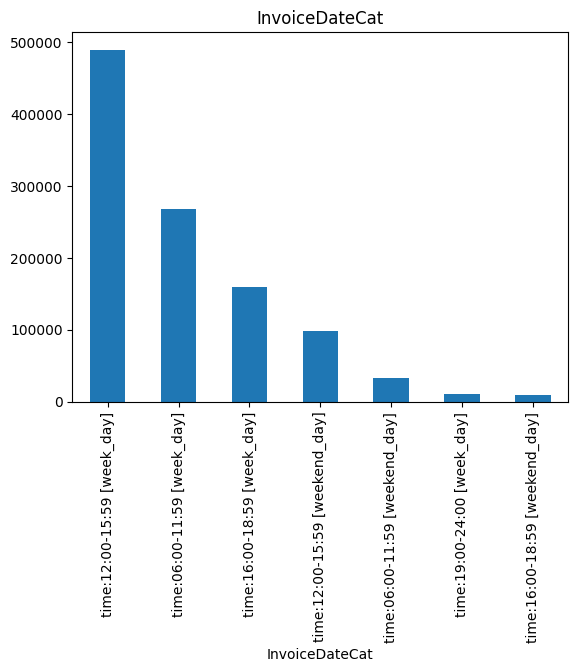

In [2]:
retail_dataset = dataset.Dataset("retail.csv")
#retail_dataset.handle_missing_or_wrong_values()
retail_dataset.categorize_data()

print("max", retail_dataset.df['InvoiceDate'].max())
print("min", retail_dataset.df['InvoiceDate'].min())
print("mean", retail_dataset.df['InvoiceDate'].mean())
print("median", retail_dataset.df['InvoiceDate'].median())

#fig, axes = plt.subplots(2, 3)

limited_information =  retail_dataset.df
limited_information['InvoiceDateCat'].value_counts().plot(kind='bar', title='InvoiceDateCat')

print(limited_information['InvoiceDateCat'].value_counts())


# Association rules


## First we will try out different configurations for featurs

In [15]:
from apyori import apriori
from dataset import Dataset

def print_association_rules(association_results):
    association_results = sorted(association_results, key=lambda rule: (-rule.ordered_statistics[0].confidence, -rule.support))
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

def association_rule(features, min_support, min_confidence, min_lift):
    print(f"=== {features} ===")
    orders_depending_on_invoice = list(dataset.df[features].itertuples(index=False, name=None))
    print(f"Total order count: {len(orders_depending_on_invoice)}")
    print(f"Support: {min_support} ({len(orders_depending_on_invoice) * min_support} items needed)")
    print(f"Confidence: {len(orders_depending_on_invoice)}")
    print(f"Total order count: {len(orders_depending_on_invoice)}")
    association_results = list(apriori(orders_depending_on_invoice, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift))
    print_association_rules(association_results)

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)
dataset.df = dataset.df.astype(str)

association_rule(["quantityCat", "priceCat", "Customer ID"], 0.001, 0.5, 2)
association_rule(["Description", "quantityCat"], 0.001, 0.5, 2)
association_rule(["Description", "InvoiceDateCat"], 0.001, 0.3, 1)


=== ['quantityCat', 'priceCat', 'Customer ID'] ===
Total order count: 100000
Support: 0.001 (100.0 items needed)
Confidence: 100000
Total order count: 100000
['18139.0']  ->  ['many']  |  confidence: 1.00, support: 0.00, lift: 3.57
['small', '14911.0']  ->  ['extremely_expensive']  |  confidence: 1.00, support: 0.00, lift: 4.92
['17511.0']  ->  ['many']  |  confidence: 0.96, support: 0.00, lift: 3.42
['13408.0']  ->  ['many']  |  confidence: 0.94, support: 0.00, lift: 3.37
['12748.0', 'extremely_expensive']  ->  ['small']  |  confidence: 0.94, support: 0.00, lift: 2.47
['16005.0']  ->  ['small']  |  confidence: 0.94, support: 0.00, lift: 2.46
['cheap', '13081.0']  ->  ['many']  |  confidence: 0.93, support: 0.00, lift: 3.33
['cheap', '14911.0']  ->  ['many']  |  confidence: 0.93, support: 0.00, lift: 3.33
['15872.0']  ->  ['small']  |  confidence: 0.92, support: 0.00, lift: 2.43
['15436.0']  ->  ['small']  |  confidence: 0.90, support: 0.00, lift: 2.37
['12748.0', 'many']  ->  ['cheap'

## Association rules between descriptions
Association to recommend products

In [3]:
from apyori import apriori
from dataset import Dataset

def print_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.025
CONFIDENCE = 0.7
MIN_LIFT = 2

print("=== products often bought tougher ===")
orders_depending_on_invoice = dataset.get_grouped_data("Invoice", "Description")
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)


=== products often bought tougher ===
Total order count: 4143
Support: 0.025 (103.575 items needed)
Confidence: 4143
Total order count: 4143
['ALARM CLOCK BAKELIKE GREEN']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.74, support: 0.04, lift: 13.84
['BAKING SET SPACEBOY DESIGN']  ->  ['BAKING SET 9 PIECE RETROSPOT ']  |  confidence: 0.81, support: 0.03, lift: 12.11
['GARDENERS KNEELING PAD CUP OF TEA ']  ->  ['GARDENERS KNEELING PAD KEEP CALM ']  |  confidence: 0.72, support: 0.04, lift: 10.30
['SET OF 3 WOODEN TREE DECORATIONS']  ->  ['SET OF 3 WOODEN STOCKING DECORATION']  |  confidence: 0.78, support: 0.03, lift: 20.68
['WOODEN HEART CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN STAR CHRISTMAS SCANDINAVIAN']  |  confidence: 0.78, support: 0.05, lift: 11.08
['WOODEN TREE CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN HEART CHRISTMAS SCANDINAVIAN']  |  confidence: 0.73, support: 0.03, lift: 11.01
['WOODEN TREE CHRISTMAS SCANDINAVIAN']  ->  ['WOODEN STAR CHRISTMAS SCANDINAVIAN']  |  confidence

Association rules between products and quantities

In [43]:
def print_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.001
CONFIDENCE = 0.4
MIN_LIFT = 1.5

print("=== products often bought tougher ===")
orders_depending_on_invoice = list(dataset.df[["Description", "quantityCat"]].itertuples(index=False, name=None))
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)

=== products often bought tougher ===
Total order count: 100000
Support: 0.001 (100.0 items needed)
Confidence: 100000
Total order count: 100000
['60 CAKE CASES VINTAGE CHRISTMAS']  ->  ['many']  |  confidence: 0.53, support: 0.00, lift: 1.91
['ALARM CLOCK BAKELIKE GREEN']  ->  ['normal']  |  confidence: 0.52, support: 0.00, lift: 1.53
['ALARM CLOCK BAKELIKE RED ']  ->  ['normal']  |  confidence: 0.56, support: 0.00, lift: 1.66
['ANTIQUE SILVER T-LIGHT GLASS']  ->  ['many']  |  confidence: 0.73, support: 0.00, lift: 2.60
['ASSORTED COLOUR BIRD ORNAMENT']  ->  ['many']  |  confidence: 0.47, support: 0.00, lift: 1.67
['BAKING SET 9 PIECE RETROSPOT ']  ->  ['normal']  |  confidence: 0.57, support: 0.00, lift: 1.69
['BLUE HARMONICA IN BOX ']  ->  ['many']  |  confidence: 0.54, support: 0.00, lift: 1.92
['CHRISTMAS CRAFT LITTLE FRIENDS']  ->  ['normal']  |  confidence: 0.51, support: 0.00, lift: 1.50
['CHRISTMAS CRAFT TREE TOP ANGEL']  ->  ['normal']  |  confidence: 0.53, support: 0.00, lif

## Association rules categories and time categories

In [20]:
SUPPORT = 0.02
CONFIDENCE = 0.8
MIN_LIFT = 1.5

def print_time_slot_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric

        contains_item = False
        for item in pair:
            if "time:" in item:
                contains_item = True

        if contains_item:
            print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

print("=== products often bought tougher ===")
orders_depending_on_invoice = dataset.df.groupby('Customer ID').apply(lambda x: list(x['InvoiceDateCat'].unique()) + list(x['Description'].unique())).tolist()

print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_time_slot_association_rules(association_results)

=== products often bought tougher ===


/tmp/ipykernel_29231/4220124145.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  orders_depending_on_invoice = dataset.df.groupby('Customer ID').apply(lambda x: list(x['InvoiceDateCat'].unique()) + list(x['Description'].unique())).tolist()


Total order count: 2157
Support: 0.02 (43.14 items needed)
Confidence: 2157
Total order count: 2157
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE CHOCOLATE']  ->  ['ALARM CLOCK BAKELIKE GREEN']  |  confidence: 0.82, support: 0.02, lift: 10.50
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE CHOCOLATE']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.85, support: 0.02, lift: 10.72
['time:06:00-11:59 []', 'ALARM CLOCK BAKELIKE GREEN']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.83, support: 0.03, lift: 10.40
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE GREEN']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.80, support: 0.05, lift: 10.07
['time:12:00-15:59 []', 'ALARM CLOCK BAKELIKE IVORY']  ->  ['ALARM CLOCK BAKELIKE RED ']  |  confidence: 0.80, support: 0.03, lift: 10.07
['time:06:00-11:59 []', 'BAKING SET SPACEBOY DESIGN']  ->  ['BAKING SET 9 PIECE RETROSPOT ']  |  confidence: 0.89, support: 0.02, lift: 9.07
['time:12:00-15:59 []', 'BAKING SET SPACEBOY DESIGN']  ->  [

In [42]:
def print_association_rules(association_results):
    for item in association_results:
        pair = item.items  # The product combinations
        support = item.support  # Support value

        ordered_statistics = item.ordered_statistics[0]  # First rule (can iterate if needed)
        base_items = ordered_statistics.items_base  # LHS (if A, then B)
        add_items = ordered_statistics.items_add  # RHS (then B)
        confidence = ordered_statistics.confidence  # Confidence score
        lift = ordered_statistics.lift  # Lift metric
        print([x for x in base_items], " -> ", [x for x in add_items], " | ", f"confidence: {confidence:.2f}, support: {support:.2f}, lift: {lift:.2f}")

dataset = Dataset("retail.csv")
dataset.handle_missing_or_wrong_values()
dataset.categorize_data()
dataset.keep_last_x_items(100000)

SUPPORT = 0.0015
CONFIDENCE = 0.4
MIN_LIFT = 1

print("=== products often bought tougher ===")
orders_depending_on_invoice = list(dataset.df[["Description", "InvoiceDateCat"]].itertuples(index=False, name=None))
print(f"Total order count: {len(orders_depending_on_invoice)}")
print(f"Support: {SUPPORT} ({len(orders_depending_on_invoice) * SUPPORT} items needed)")
print(f"Confidence: {len(orders_depending_on_invoice)}")
print(f"Total order count: {len(orders_depending_on_invoice)}")
association_results = list(apriori(orders_depending_on_invoice, min_support=SUPPORT, min_confidence=CONFIDENCE, min_lift=MIN_LIFT))
print_association_rules(association_results)

=== products often bought tougher ===
Total order count: 100000
Support: 0.0015 (150.0 items needed)
Confidence: 100000
Total order count: 100000
[]  ->  ['time:12:00-15:59 []']  |  confidence: 0.61, support: 0.61, lift: 1.00
['60 CAKE CASES VINTAGE CHRISTMAS']  ->  ['time:12:00-15:59 []']  |  confidence: 0.67, support: 0.00, lift: 1.10
['GARDENERS KNEELING PAD CUP OF TEA ']  ->  ['time:12:00-15:59 []']  |  confidence: 0.62, support: 0.00, lift: 1.02
['GARDENERS KNEELING PAD KEEP CALM ']  ->  ['time:12:00-15:59 []']  |  confidence: 0.61, support: 0.00, lift: 1.01
['HAND WARMER BIRD DESIGN']  ->  ['time:12:00-15:59 []']  |  confidence: 0.63, support: 0.00, lift: 1.04
['HAND WARMER OWL DESIGN']  ->  ['time:12:00-15:59 []']  |  confidence: 0.61, support: 0.00, lift: 1.01
['HAND WARMER RED LOVE HEART']  ->  ['time:12:00-15:59 []']  |  confidence: 0.64, support: 0.00, lift: 1.05
['HAND WARMER SCOTTY DOG DESIGN']  ->  ['time:12:00-15:59 []']  |  confidence: 0.64, support: 0.00, lift: 1.06
['